# Deep Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score , precision_score, recall_score, accuracy_score
import pandas as pd

In [2]:
mydf = pd.read_pickle('sard_graph.pkl')

In [3]:
print("Accuracy")
print(accuracy_score(mydf.label,np.array(mydf.predicted)))
print("confusion matrix")
print(confusion_matrix(mydf.label,np.array(mydf.predicted)))
print("precision")
print(precision_score(mydf.label,np.array(mydf.predicted),average=None, labels=[0,1,2,3]))
print("recall")
print(recall_score(mydf.label,np.array(mydf.predicted),average=None, labels=[0,1,2,3]))
print("f1")
print(f1_score(mydf.label,np.array(mydf.predicted),average=None, labels=[0,1,2,3]))

Accuracy
0.8438914027149321
confusion matrix
[[226   5  60   2]
 [  0  27   1   1]
 [  0   0  96   0]
 [  0   0   0  24]]
precision
[1.         0.84375    0.61146497 0.88888889]
recall
[0.77133106 0.93103448 1.         1.        ]
f1
[0.87090559 0.8852459  0.75889328 0.94117647]


# Correctly predicted

In [4]:
mydf[mydf.label==mydf.predicted].label.value_counts()

0    226
2     96
1     27
3     24
Name: label, dtype: int64

In [5]:
correct = mydf[mydf.predicted==mydf.label]
correct = correct[correct.label==1]
len(correct)

working_c = [len(grad)==len(ig) for grad,ig in zip(correct.gradients,correct.ig)]
len(working_c)

displ_all_func_c=[]
displ_grads_c = []
displ_igrad_c =[]

correct[working_c].function.apply(displ_all_func_c.extend)
correct[working_c].gradients.apply(displ_grads_c.extend)
correct[working_c].ig.apply(displ_igrad_c.extend)

53     None
55     None
57     None
73     None
80     None
82     None
120    None
124    None
143    None
166    None
170    None
176    None
186    None
193    None
224    None
248    None
257    None
265    None
298    None
305    None
321    None
322    None
323    None
332    None
342    None
344    None
348    None
Name: ig, dtype: object

In [6]:
correct = pd.DataFrame({'token':displ_all_func_c, 'grads':displ_grads_c, 'ig':displ_igrad_c})
correct = correct.groupby('token').mean()

In [7]:
correct.sort_values('grads',ascending=False)[:20]

,grads,ig
token,,
MYSQL_QUERY,0.026284,0.167141
MYSQL_REAL_ESCAPE_STRING,0.017866,0.471340
MYSQL_SELECT_DB,0.017177,0.101880
RPAREN,0.016883,0.974044
$_GET,0.016585,0.297528
FILTER_VALIDATE_EMAIL,0.016252,0.496012
EXEC,0.015592,0.354154
FCLOSE,0.015283,0.486224
EQUALS,0.015083,0.858438


<AxesSubplot:title={'center':'CORRECT PREDICTION'}, ylabel='token'>

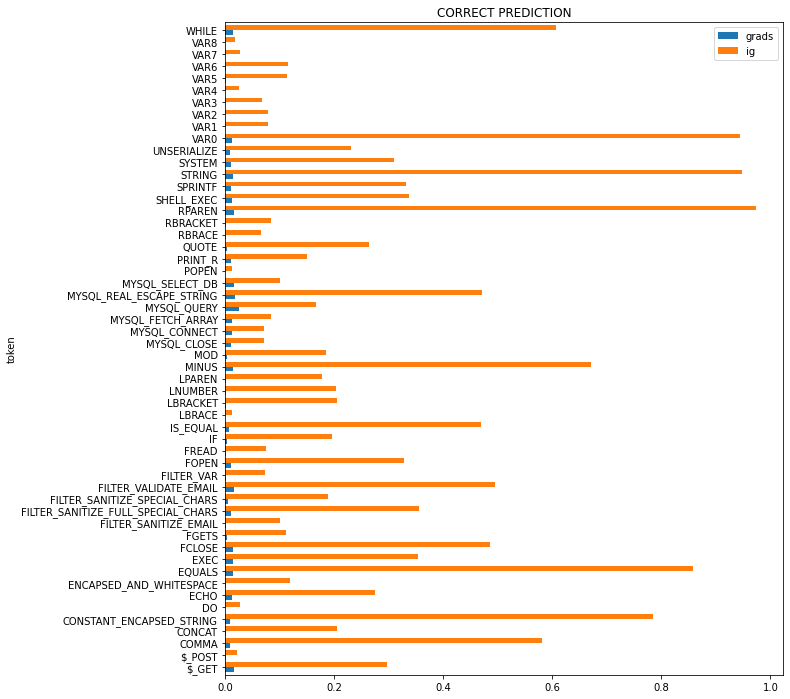

In [10]:
correct.plot.barh(figsize=(10,12),width=0.8, title='CORRECT PREDICTION')

# Incorrectly predicted

In [11]:
mydf[mydf.label!=mydf.predicted].label.value_counts()

0    67
1     2
Name: label, dtype: int64

In [12]:
incorrect = mydf[mydf.predicted!=mydf.label]
incorrect = incorrect[incorrect.label==1]
len(incorrect)

2

In [13]:
working = [len(grad)==len(ig) for grad,ig in zip(incorrect.gradients,incorrect.ig)]
len(working)

2

In [14]:
displ_all_func=[]
displ_grads = []
displ_igrad =[]

incorrect[working].function.apply(displ_all_func.extend)
incorrect[working].gradients.apply(displ_grads.extend)
incorrect[working].ig.apply(displ_igrad.extend)

37     None
356    None
Name: ig, dtype: object

In [15]:
incorrect = pd.DataFrame({'token':displ_all_func, 'grads':displ_grads, 'ig':displ_igrad})
incorrect = incorrect.groupby('token').mean()

In [16]:
incorrect.sort_values('grads',ascending=True)

,grads,ig
token,,
VAR2,0.000527,0.043312
LBRACKET,0.000733,0.024699
FILTER_VAR,0.000749,0.019893
RBRACKET,0.000831,0.030869
VAR1,0.000875,0.069238
VAR4,0.001091,0.071341
VAR3,0.001410,0.105387
ENCAPSED_AND_WHITESPACE,0.001428,0.101734
VAR6,0.001445,0.069890


<AxesSubplot:title={'center':'INCORRECT PREDICTION'}, ylabel='token'>

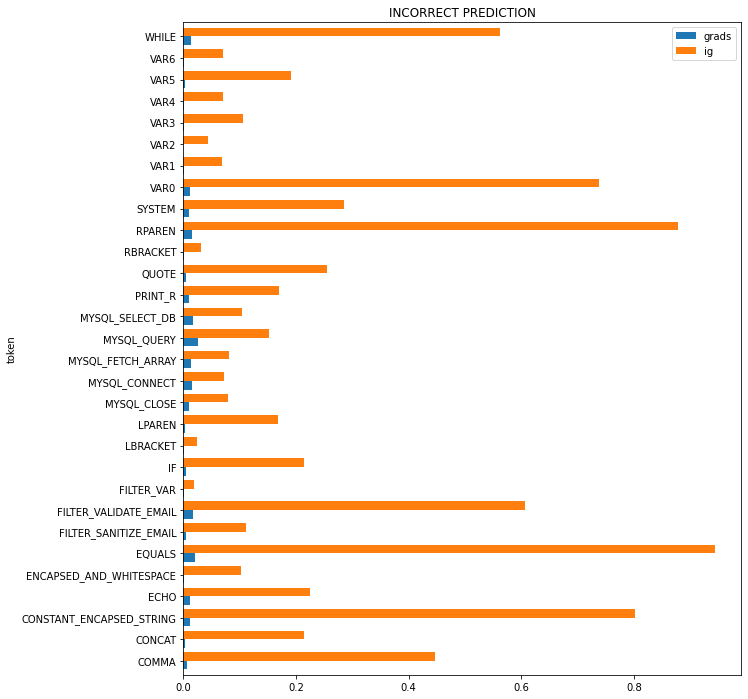

In [19]:
incorrect.plot.barh(figsize=(10,12),width=0.8,title='INCORRECT PREDICTION')

### Sorted (Correct)

<AxesSubplot:title={'center':'CORRECT PREDICTION'}, ylabel='token'>

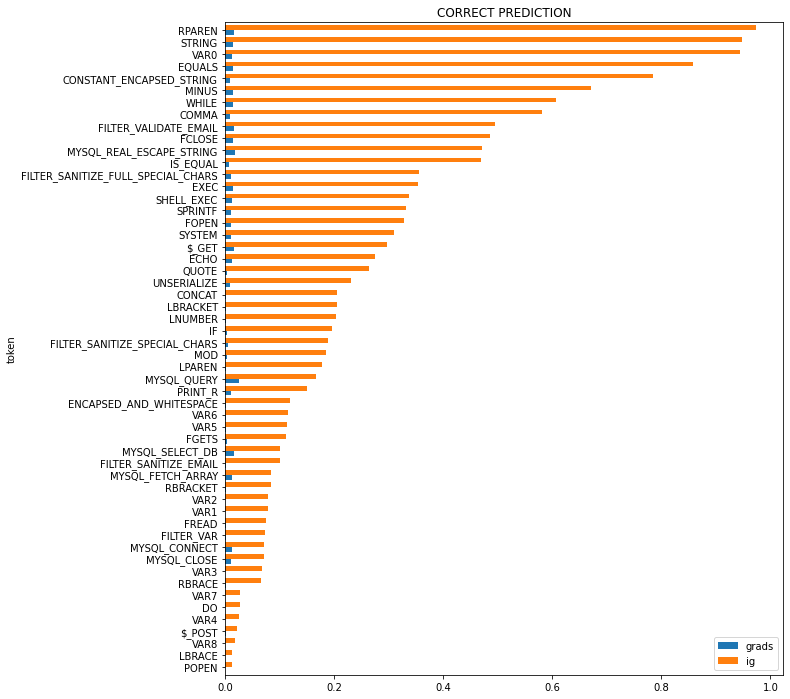

In [20]:
correct.sort_values('ig',ascending=True).plot.barh(figsize=(10,12),width=0.8, title='CORRECT PREDICTION')

### Sorted (Incorrect)

<AxesSubplot:title={'center':'INCORRECT PREDICTION'}, ylabel='token'>

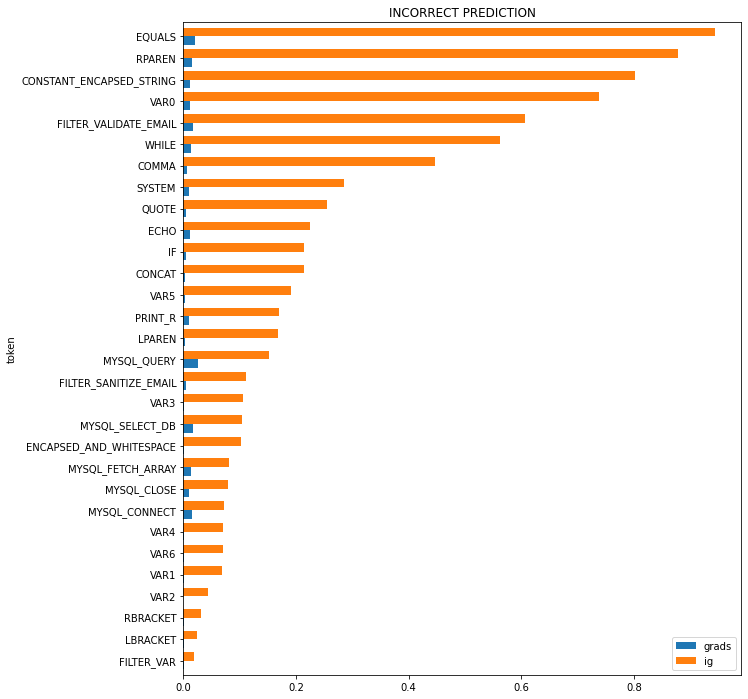

In [21]:
incorrect.sort_values('ig',ascending=True).plot.barh(figsize=(10,12),width=0.8,title='INCORRECT PREDICTION')

In [26]:
k =mydf[mydf.predicted==mydf.label]

In [44]:
k

,function,weights,gradients,ig,html_grads,html_ig,label,predicted,filename
0,"[VAR4, EQUALS, SHELL_EXEC, LPAREN, CONSTANT_EN...","[[-0.14523997902870178, 0.08916662633419037, -...","[0.060078792794347156, 0.22463565371590963, 0....","[0.1417656, 0.31877425, 0.42472005, 0.51008016...","<h1 style=""text-align: center;""><span style=""t...","<h1 style=""text-align: center;""><span style=""t...",0,0,None
1,"[VAR4, EQUALS, CONSTANT_ENCAPSED_STRING, EXEC,...","[[-0.14523997902870178, 0.08916662633419037, -...","[0.0015877627190202443, 0.01150073785575432, 0...","[0.016106114, 0.12501112, 1.0, 0.23838905, 1.0...","<h1 style=""text-align: center;""><span style=""t...","<h1 style=""text-align: center;""><span style=""t...",2,2,None
2,"[VAR0, EQUALS, STRING, LPAREN, QUOTE, ENCAPSED...","[[-0.14523997902870178, 0.08916662633419037, -...","[0.008938288171378036, 0.0564048425483072, 0.0...","[0.21959122, 0.99999994, 0.0629906, 0.16804922...","<h1 style=""text-align: center;""><span style=""t...","<h1 style=""text-align: center;""><span style=""t...",2,2,None
3,"[VAR5, EQUALS, $_POST, LBRACKET, CONSTANT_ENCA...","[[-0.14523997902870178, 0.08916662633419037, -...","[0.006718593768467158, 0.04218896321558446, 0....","[0.09671342, 0.46727297, 0.04609216, 0.2057500...","<h1 style=""text-align: center;""><span style=""t...","<h1 style=""text-align: center;""><span style=""t...",0,0,None
4,"[VAR5, EQUALS, $_POST, LBRACKET, CONSTANT_ENCA...","[[-0.14523997902870178, 0.08916662633419037, -...","[0.007630113434152552, 0.03736651606918187, 0....","[0.12966706, 0.5078348, 0.1350797, 0.20097363,...","<h1 style=""text-align: center;""><span style=""t...","<h1 style=""text-align: center;""><span style=""t...",0,0,None
...,...,...,...,...,...,...,...,...,...
437,"[VAR0, EQUALS, LBRACE, LBRACKET, CONSTANT_ENCA...","[[-0.14523997902870178, 0.08916662633419037, -...","[0.011316391376853087, 0.012309684868457798, 0...","[1.0000001, 0.82578266, 0.01638534, 0.32504722...","<h1 style=""text-align: center;""><span style=""t...","<h1 style=""text-align: center;""><span style=""t...",2,2,None
438,"[VAR2, EQUALS, SHELL_EXEC, LPAREN, CONSTANT_EN...","[[-0.14523997902870178, 0.08916662633419037, -...","[0.0011563687747082648, 0.01217291960210868, 0...","[0.08916741, 0.7097954, 0.33900574, 0.0970337,...","<h1 style=""text-align: center;""><span style=""t...","<h1 style=""text-align: center;""><span style=""t...",0,0,None
439,"[VAR0, EQUALS, STRING, LPAREN, QUOTE, ENCAPSED...","[[-0.14523997902870178, 0.08916662633419037, -...","[0.011312695930493182, 0.012195391125812288, 0...","[0.7764923, 0.63689065, 1.0, 0.083713025, 0.20...","<h1 style=""text-align: center;""><span style=""t...","<h1 style=""text-align: center;""><span style=""t...",0,0,None
440,"[VAR0, EQUALS, FOPEN, LPAREN, CONSTANT_ENCAPSE...","[[-0.14523997902870178, 0.08916662633419037, -...","[0.011589088935013038, 0.012122282989506161, 0...","[0.889456, 0.7098614, 0.27134824, 0.095719725,...","<h1 style=""text-align: center;""><span style=""t...","<h1 style=""text-align: center;""><span style=""t...",0,0,None
